<h1 align=center>Análisis Exploratorio de los Datos

A partir de datos otorgados por el ENACOM (Ente Nacional de Telecomunicaciones de Argentina) en el sitio web https://indicadores.enacom.gob.ar/datos-abiertos, Reporte del año 2023, Trimestre Octubre-Diciembre, subsección "internet" se realiza un EDA

Los datos provienen en un archivo de formato excel (.xlsx) con 15 hojas. A continuación se detallan las hojas descartadas e incluidas en el posterior informe 
<hr>

Hojas que no serán utilizadas
- Acc_vel_sinrangos: cantidad de accesos a distintas velocidades por provincia, partido y localidad. 
- Velocidad_sin_Rangos: accesos a distintas velocidades por provincia y trimestre. 
- Accesos_tecnologia_localidad: cantidad de accesos de cada tipo por provincia, partido y localidad


Hojas a Utilizar
1. Velocidad % por prov: velocidad media en Mbps por provincia y trimestre
2. Totales VMD: velocidad media de bajada por trimestre nivel nacional


3. Totales Accesos Por Tecnologia: Cantidad de accesos por tecnologia a nivel nacional por trimestre
4. Accesos por Tecnologia: accesos por tecn. por provincia y trimestre

5. Dial-BAf: Accesos Dial-up o Banda Ancha por provincia y trimestre
6. Totales Dial-BAf: accesos Dial-Up o Banda ancha nivel nacional por trimestre

7. Penetración-población: accesos por cada 100 hab. por provincia y trimestre
8. Penetracion-hogares: accesos por cada 100 hogares por provincia y trimestre
9. Penetración totales: accesos por cada 100 hab. y 100 hogares nivel nacional por trimestre

10. Totales Accesos por velocidad: cant. de accesos por rango de velocidad nivel nacional por trimestre
11. Accesos por velocidad: cant. de accesos por rango de velocidad por provincia y trimestre

12. Ingresos: ingresos en miles de pesos nivel nacional por trimestre

<hr>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Hoja 'Velocidad % por prov'

In [2]:
# Abrimos la primera hoja: "Velocidad % por prov" y la analizamos
df1 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Velocidad % por prov')
df1

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.490000
1,2023,4,Capital Federal,234.440000
2,2023,4,Catamarca,89.400000
3,2023,4,Chaco,107.140000
4,2023,4,Chubut,20.290000
...,...,...,...,...
955,2014,1,Santa Cruz,3.315991
956,2014,1,Santa Fe,3.147407
957,2014,1,Santiago Del Estero,2.949472
958,2014,1,Tierra Del Fuego,3.446888


In [3]:
print(df1['Provincia'].nunique())
df1['Provincia'].unique()



24


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)


### 960 Entradas que van desde el trimestre 1 del año 2014 al trimestre 4 del año 2023, separadas en 24 provincias con su velocidad promedio en Mbps
<hr>

In [4]:
duplicados = df1.duplicated(subset=['Año', 'Trimestre','Provincia' ])
df1[duplicados]

,Año,Trimestre,Provincia,Mbps (Media de bajada)


In [5]:
df1.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

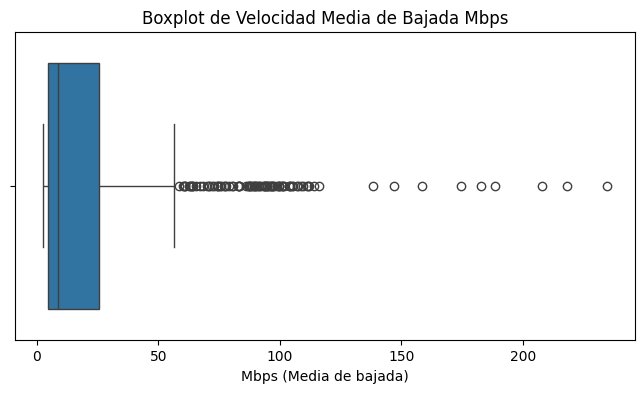

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['Mbps (Media de bajada)'])
plt.title('Boxplot de Velocidad Media de Bajada Mbps')
plt.xlabel('Mbps (Media de bajada)')
plt.show()

### notamos una gran cantidad de Outliers respecto al IQR

In [7]:
# REvisión de los Outliers
Q1 = df1['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df1['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df1[(df1['Mbps (Media de bajada)'] < limite_inferior) | (df1['Mbps (Media de bajada)'] > limite_superior)]

print("Outliers en Mbps (Media de bajada):")
outliers

Outliers en Mbps (Media de bajada):


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.490000
1,2023,4,Capital Federal,234.440000
2,2023,4,Catamarca,89.400000
3,2023,4,Chaco,107.140000
5,2023,4,Córdoba,114.030000
...,...,...,...,...
265,2021,1,Capital Federal,68.290269
289,2020,4,Capital Federal,67.325137
313,2020,3,Capital Federal,63.808520
337,2020,2,Capital Federal,60.484497


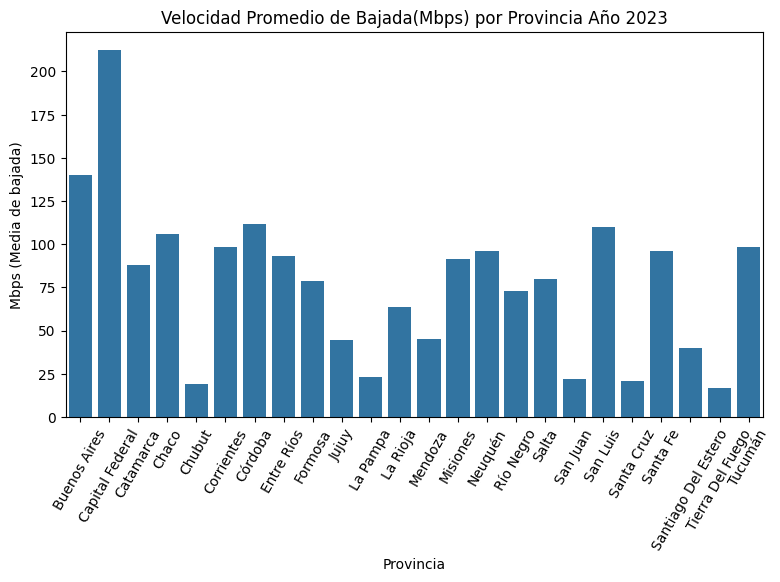

In [8]:
# Se observa solo el año 2023 por Provincia

df1_2023 = df1[df1['Año'] == 2023]
promedio_por_provincia = df1_2023.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=promedio_por_provincia)
plt.title('Velocidad Promedio de Bajada(Mbps) por Provincia Año 2023')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=60)
plt.show()


### En la data de 'Vel % por prov' nos encontramos que no hay datos duplicados ni faltanes. 
Sin embargo hay 94 datos considerados outliers. Si nos fijamos son provincias importantes de la Argentina,lo que explica su valor alto en su velocidad promedio de conexión a internet, en comparación a provincias mas rurales, así como tambien el auento explosivo de las velocidad crea estos outliers. Permanecen como datos válidos
<hr>

## 2. Hoja 'Totales VMD'

In [9]:
# leemos el archivo y los observamos
df2 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Totales VMD')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     40 non-null     int64  
 1   Trimestre               40 non-null     int64  
 2   Mbps (Media de bajada)  40 non-null     float64
 3   Trimestre.1             40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2023,4,139.04,Oct-Dic 2023
1,2023,3,129.67,Jul-Sept 2023
2,2023,2,123.95,Abr-Jun 2023
3,2023,1,110.50,Ene-Mar 2023
4,2022,4,106.56,Oct-Dic 2022


In [10]:
# eliminamos la columna trimestre
df2.drop('Trimestre.1', axis=1, inplace=True)

In [11]:
df2.head()

,Año,Trimestre,Mbps (Media de bajada)
0,2023,4,139.04
1,2023,3,129.67
2,2023,2,123.95
3,2023,1,110.50
4,2022,4,106.56


In [12]:
# analizamos duplicados
duplicados = df2.duplicated(subset=['Año', 'Trimestre'])
df2[duplicados]

,Año,Trimestre,Mbps (Media de bajada)


In [13]:
df2.isna().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
dtype: int64

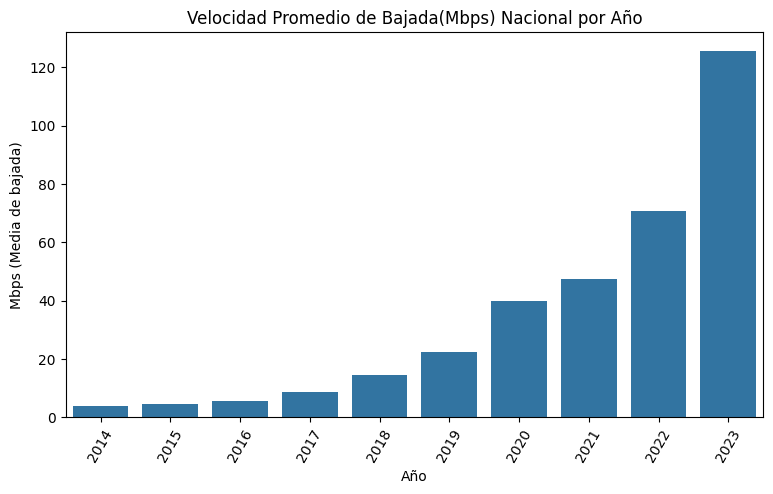

In [14]:
# agrupamos por año para analizar el cambio temporal
promedio_por_año = df2.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

# graficamos bajada nacional por año
plt.figure(figsize=(9, 5))
sns.barplot(x='Año', y='Mbps (Media de bajada)', data=promedio_por_año)
plt.title('Velocidad Promedio de Bajada(Mbps) Nacional por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=60)
plt.show()

### En este data 'Totales VMD' se encuentran 10 años de registros trimestrales nacionales de la velocidad de bajada promedio. No contiene datos faltantes ni duplicados, y sus outliers, como podemos ver en el gráfico, son debido al aumento casi exponencial de la velocidad promedio de bajada
<hr>

## 3. Hoja 'Totales Accesos Por Tecnologia'

In [15]:
# leemos el archivo y los observamos
df3 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           40 non-null     int64 
 1   Trimestre     40 non-null     int64 
 2   ADSL          40 non-null     int64 
 3   Cablemodem    40 non-null     int64 
 4   Fibra óptica  40 non-null     int64 
 5   Wireless      40 non-null     int64 
 6   Otros         40 non-null     int64 
 7   Total         40 non-null     int64 
 8   Periodo       40 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.9+ KB


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
1,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
2,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
3,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
4,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022


In [16]:
# La columna 'Periodo' no nos interesa (está en trimestre)
df3.drop('Periodo', axis=1, inplace=True)

In [17]:
# cambiamos el nombre de la columna total a total_tec
df3.rename(columns={'Total': 'Total_tec'}, inplace=True)
df3.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_tec
0,2023,4,836390,6022532,3908183,585760,194796,11547661
1,2023,3,897895,6018832,3708718,581436,200027,11406908
2,2023,2,1006509,5997149,3463988,581823,202428,11251897
3,2023,1,1204417,6002582,3243411,576647,214838,11241895
4,2022,4,1315373,6037457,3060575,572969,221740,11208114


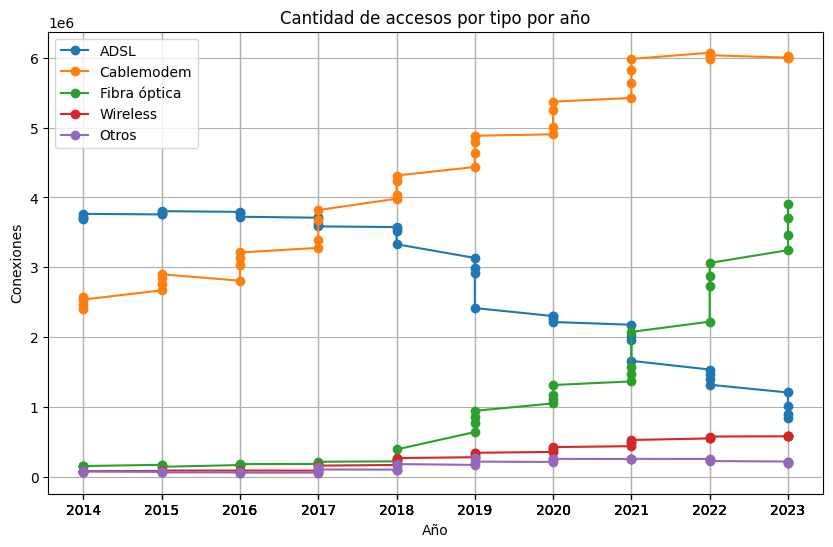

In [18]:
# Agrupamos por año para analizar los distintos tipos de acceso a traves del tiempo
df_agrupado = df3.groupby('Año').mean().reset_index()
df_agrupado


# se grafican los tipos de acceso
columnas_a_graficar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.figure(figsize=(10, 6))
for columna in columnas_a_graficar:
    plt.plot(df3['Año'], df3[columna], marker='o', label=columna)


plt.title('Cantidad de accesos por tipo por año')
plt.xlabel('Año')
plt.ylabel('Conexiones')
plt.xticks(df3['Año']) 
plt.legend()  
plt.grid(True) 
plt.show()

### En esta Data no existen duplicados ni faltantes. Los outliers se deben al crecimiento o decrecimiento con los años de ciertas tecnologías de acceso
Podemos observar en el gráfico que las conexiones ADSL han bajado mucho mientras que Cablemodem y la mas reciente Fibra óptica han subido mucho
<hr>

## 4. Hoja 'Accesos por Tecnologia'

In [19]:
# leemos el archivo y los observamos
df4 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Accesos Por Tecnología')
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


In [20]:
df4.isna().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [21]:
df4['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       nan], dtype=object)

In [22]:
df4['Año'].unique()

array([2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015,
       2014, nan, '*'], dtype=object)

### Notamos que hay entradas con año "2019 *"

In [23]:
df4['Trimestre'].unique()

array([4, 3, 2, 1, '3 *', '2 *', '1 *', nan,
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

### Así también Trimestres con asteriscos. Se reemplazan ambos

In [24]:
df4['Año'] = df4['Año'].replace('2019 *', 2019)
df4['Año'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, nan,
       '*'], dtype=object)

In [25]:
df4['Trimestre'] = df4['Trimestre'].replace('3 *', 3)
df4['Trimestre'] = df4['Trimestre'].replace('2 *', 2)
df4['Trimestre'] = df4['Trimestre'].replace('1 *', 1)

In [26]:
filas_con_nan = df4[df4.isna().any(axis=1)]
filas_con_nan

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Notamos que tenemos unas filas sin valores en el dataframe, y las borramos

In [27]:
# botamos los Nan
df4 = df4.dropna()
# Renombramos columna 'Total' por 'Total_tec'
df4.rename(columns={'Total': 'Total_tec'}, inplace=True)
df4.info()





<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    object 
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total_tec     960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 75.0+ KB


### 960 filas, que correspondan a los 4 trimestres de 10 años, con 24 provincias cada una. Para cada entrada, su cantidad de conexiones ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total. Similar al df3 pero distinguido por provincia. No hay duplicados y los outliers son explicados por el contexto y no por error en los datos
<hr>

## 5. Hoja 'Dial-BAf'

In [28]:
# leemos el archivo y los observamos
df5 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Dial-BAf')
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           958 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5005720,5900.0,5011620
1,2023,4,Capital Federal,1472317,2050.0,1474367
2,2023,4,Catamarca,74586,1.0,74587
3,2023,4,Chaco,147381,5.0,147386
4,2023,4,Chubut,169313,857.0,170170


In [29]:
# renombramos la columna total por 'Total_acc'
df5.rename(columns={'Total': 'Total_dialBaf'}, inplace=True)

### Observamos que hay 2 valores NaN y los buscamos

In [30]:
filas_con_nan = df5[df5.isna().any(axis=1)]
filas_con_nan

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_dialBaf
536,2018,2,Formosa,44554,NaN,44554
541,2018,2,Misiones,106147,NaN,106147


In [31]:
# Observamos valores proximos temporales para decidir que tratamniento realizar a los NaN
filas_cercanas = df5.iloc[530:546]
filas_cercanas

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_dialBaf
530,2018,2,Catamarca,34078,11.0,34089
531,2018,2,Chaco,98509,12.0,98521
532,2018,2,Chubut,98137,2427.0,100564
533,2018,2,Córdoba,712979,94.0,713073
534,2018,2,Corrientes,97946,11.0,97957
535,2018,2,Entre Ríos,199937,48.0,199985
536,2018,2,Formosa,44554,NaN,44554
537,2018,2,Jujuy,45132,1.0,45133
538,2018,2,La Pampa,82177,244.0,82421
539,2018,2,La Rioja,51931,17.0,51948


In [32]:
df_formosa = df5[df5['Provincia']== 'Formosa']
df_formosa

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_dialBaf
8,2023,4,Formosa,62002,0.0,62002
32,2023,3,Formosa,61314,0.0,61314
56,2023,2,Formosa,60350,0.0,60350
80,2023,1,Formosa,60985,0.0,60985
104,2022,4,Formosa,61840,0.0,61840
128,2022,3,Formosa,68537,1.0,68538
152,2022,2,Formosa,67881,0.0,67881
176,2022,1,Formosa,54548,0.0,54548
200,2021,4,Formosa,53663,0.0,53663
224,2021,3,Formosa,52795,0.0,52795


In [33]:
df_misiones = df5[df5['Provincia']== 'Misiones']
df_misiones

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_dialBaf
13,2023,4,Misiones,200333,0.0,200333
37,2023,3,Misiones,197135,0.0,197135
61,2023,2,Misiones,195471,0.0,195471
85,2023,1,Misiones,190685,0.0,190685
109,2022,4,Misiones,186269,0.0,186269
133,2022,3,Misiones,182157,0.0,182157
157,2022,2,Misiones,178813,0.0,178813
181,2022,1,Misiones,171508,0.0,171508
205,2021,4,Misiones,171132,0.0,171132
229,2021,3,Misiones,158528,0.0,158528


### Observamos que los valores NaN (columna 'Dial up' para provincias 'Formosa' y 'Misiones') estan rodeados en el tiemppo, antes y despues, por valores 0. Se reparan los Nan con 0

In [34]:
df5 = df5.fillna(0)
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           960 non-null    float64
 5   Total_dialBaf     960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_dialBaf
0,2023,4,Buenos Aires,5005720,5900.0,5011620
1,2023,4,Capital Federal,1472317,2050.0,1474367
2,2023,4,Catamarca,74586,1.0,74587
3,2023,4,Chaco,147381,5.0,147386
4,2023,4,Chubut,169313,857.0,170170


### no se encuentran outliers que necesiten corrección, ni valores duplicados
<hr>

## 6. Hoja 'Totales Dial-BAf'


In [35]:
# leemos el archivo y los observamos
df6 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Totales Dial-BAf')
df6.info()
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               40 non-null     int64 
 1   Trimestre         40 non-null     int64 
 2   Banda ancha fija  40 non-null     int64 
 3   Dial up           40 non-null     int64 
 4   Total             40 non-null     int64 
 5   Periodo           40 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2023,4,11535868,11793,11547661,Oct-Dic 2023
1,2023,3,11395115,11793,11406908,Jul-Sept 2023
2,2023,2,11239781,12116,11251897,Abr-Jun 2023
3,2023,1,11229459,12436,11241895,Ene-Mar 2023
4,2022,4,11195668,12446,11208114,Oct-Dic 2022


In [36]:
#Se elimina columna periodo
df6.drop('Periodo', axis=1, inplace=True)
# Se renombra columna total
df6.rename(columns={'Total': 'Total_dialBaf'}, inplace=True)


In [37]:
df6.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total_dialBaf
0,2023,4,11535868,11793,11547661
1,2023,3,11395115,11793,11406908
2,2023,2,11239781,12116,11251897
3,2023,1,11229459,12436,11241895
4,2022,4,11195668,12446,11208114


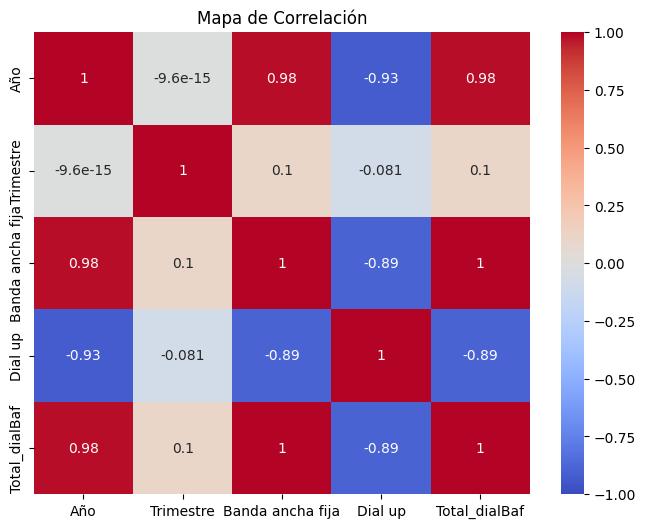

In [38]:
# Mapa de Correlación
correlation_matrix = df6.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlación')
plt.show()

### Si analizamos la correlación entre las variables 'Año' 'Banda ancha fija' y 'Dial up', observamos que existe una corelacion positiva entre el Año y la cantidad de Bancha Ancha fija y al total de conexiones,  mientras que es negativa al Dial-Up. Es decir, podemos deducir que con el tiempo la cantidad de Dial up ha disminuido y la de la Banda ancha fija ha aumentado
<hr>

## 7. Hoja 'Penetración-población' 

In [39]:
# leemos el archivo y los observamos
df7 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Penetración-poblacion')
df7.info()
df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04


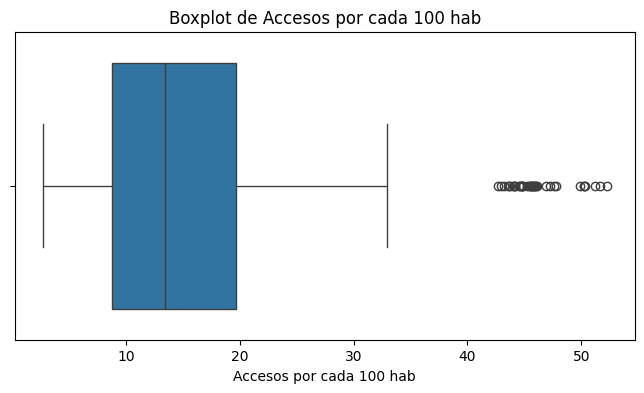

In [40]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df7['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 hab')
plt.xlabel('Accesos por cada 100 hab')
plt.show()

existen outliers, se analiza la posibilidad que sean por crecimiento de las conexiones en el tiempo

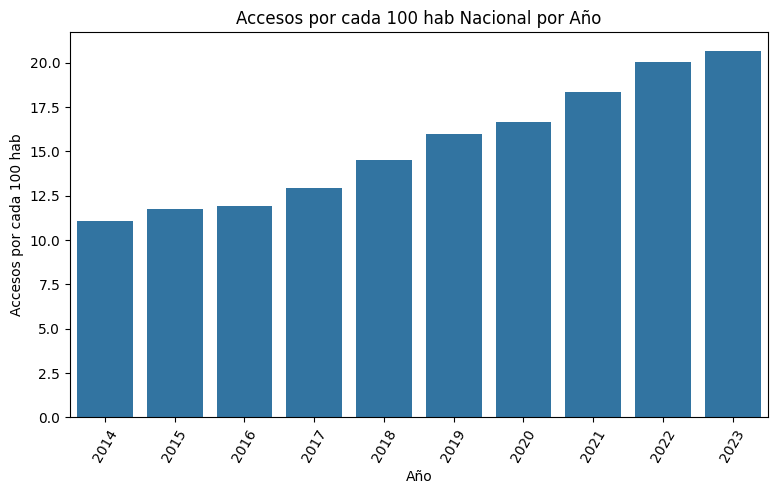

In [41]:
# agrupamos por año para analizar el cambio temporal
accesos_por_año = df7.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()

# graficamos bajada nacional por año
plt.figure(figsize=(9, 5))
sns.barplot(x='Año', y='Accesos por cada 100 hab', data=accesos_por_año)
plt.title('Accesos por cada 100 hab Nacional por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=60)
plt.show()

Podemos observar que a través de los años la cantidad de accesos por cada 100 hab. ha aumentado significativamente

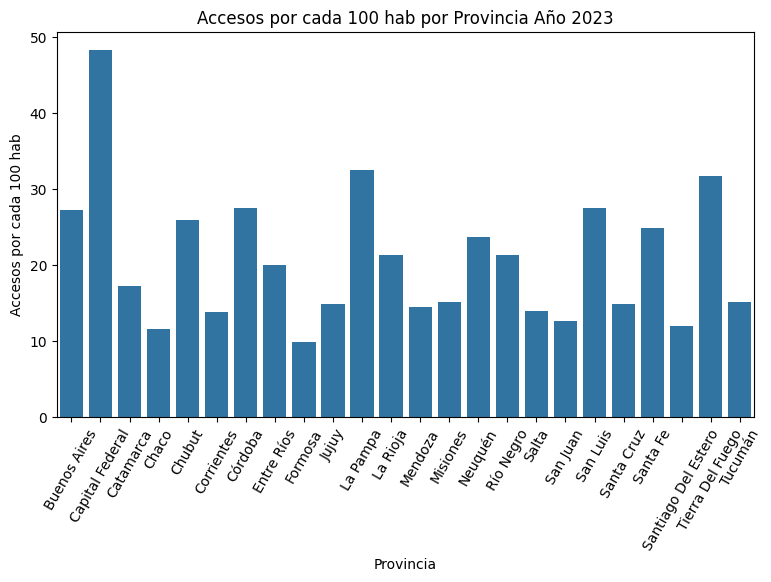

In [42]:
df7_2023 = df7[df7['Año'] == 2023]
promedio_por_provincia = df7_2023.groupby('Provincia')['Accesos por cada 100 hab'].mean().reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=promedio_por_provincia)
plt.title('Accesos por cada 100 hab por Provincia Año 2023')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=60)
plt.show()

Existen diferencias enormes entre distintas provincias en su acceso a conexión

### En esta hoja no hay duplicados ni faltantes, están los correspondientes 960 registros. Los outliers, al igual que en hojas anteriores, se debe por un lado a la diferencias entre las provincias más y menos desarrolladas en cuanto a conexión y la creciente cantidad de conexiones a través del tiempo, como se puede observar en los gráficos
<hr>

## 8. Hoja 'Penetracion-hogares'

In [43]:
# leemos el archivo y los observamos
df8 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Penetracion-hogares')
df8.info()
df8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96


In [44]:
df8.duplicated().sum()

0

In [45]:
df8.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


### Al igual que el anterior, pero en este caso acceso por cada 100 hogares. No encontramos duplicados, faltantes ni outliers que deban ser corregidos
<hr>

## 9. Hoja 'Penetracion-totales'

In [46]:
# leemos el archivo y los observamos
df9 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Penetracion-totales')
df9.info()
df9.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022


In [47]:
# borramos columna periodo
df9.drop('Periodo', axis=1, inplace=True)

In [48]:
# Analizamos si min y max tienen sentido
df9.describe()


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,40.000000,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,62.436404,19.319330
std,2.908872,1.132277,9.563500,3.134956
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.636190,16.471345
50%,2018.500000,2.500000,61.947487,19.138953
75%,2021.000000,3.250000,69.574850,21.656592
max,2023.000000,4.000000,78.560000,24.660000


In [49]:
# vemos cantidad de duplicados
df9.duplicated().sum()

0

### Esta hoja, que es la versión anual que las dos anteriores, no contiene faltantes, duplicados ni outliers, relevantes
<hr>

## 10. Hoja 'Totales Accesos por velocidad'

In [50]:
# leemos el archivo y los observamos
df10 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Totales Accesos por velocidad')
df10.info()
df10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114


### Notamos que la primera entrada dice año 2024 trimestre 4 cuando debería ser año 2023

In [51]:
# Modificamos el año incorrecto en el dataframe
df10.loc[df10['Año'] == 2024, 'Año'] = 2023

In [52]:
df10.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,40.000000,40.000000,40.0000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01
mean,2018.500000,2.500000,47670.6250,222986.575000,3.292524e+06,9.146983e+05,8.952789e+05,4.847302e+05,2.637241e+06,145046.600000,8.640177e+06
std,2.908872,1.132277,49981.9869,194006.387383,1.497346e+06,2.351130e+05,4.602764e+05,4.434259e+05,2.959224e+06,129164.653258,1.696189e+06
min,2014.000000,1.000000,5675.0000,28521.000000,9.002530e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,30132.5000,77489.250000,2.545490e+06,8.438092e+05,6.962432e+05,1.119172e+05,3.052150e+04,0.000000,7.144003e+06
50%,2018.500000,2.500000,36230.0000,198451.000000,3.327425e+06,9.848485e+05,8.029080e+05,4.222760e+05,8.691535e+05,165319.000000,8.560895e+06
75%,2021.000000,3.250000,41087.5000,316865.000000,4.848150e+06,1.060943e+06,1.061018e+06,6.049265e+05,4.733012e+06,237051.750000,9.918698e+06
max,2023.000000,4.000000,241713.0000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.224736e+06,414754.000000,1.154766e+07


In [53]:
# cambiamos el nombre ed la columna total por 'total_vel'
df10.rename(columns={'Total': 'Total_vel'}, inplace=True)

No se observan outliers que parezcan de error de ingreso de data

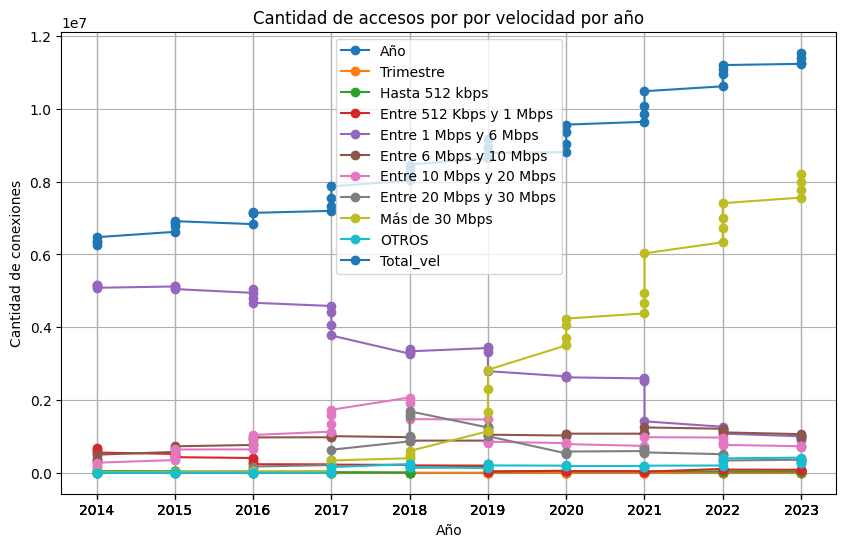

In [54]:
# Agrupamos por año para analizar los distintos tipos de acceso a traves del tiempo
df_agrupado = df10.groupby('Año').mean().reset_index()
df_agrupado

# se grafican los tipos de acceso
columnas_a_graficar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.figure(figsize=(10, 6))
for columna in df10.columns:
    plt.plot(df10['Año'], df10[columna], marker='o', label=columna)


plt.title('Cantidad de accesos por por velocidad por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.xticks(df10['Año']) 
plt.legend()  
plt.grid(True) 
plt.show()




### Podemos observar en este gráfico que tanto las conexiones de mayor velocidad así como el total de conexiones han crecido mucho en los ultimos año, explicando los outliers
<hr>

## 11. Hoja 'Accesos por velocidad'

In [55]:
# leemos el archivo y los observamos
df11 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Accesos por velocidad')
df11.info()
df11.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [56]:
# cambiamos el nombre ed la columna total por 'total_vel'
df11.rename(columns={'Total': 'Total_vel'}, inplace=True)

In [57]:
# Revisamos los valores Nan
filas_con_nan = df11[df11.isna().any(axis=1)]
filas_con_nan

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_vel
433,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
443,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
444,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
451,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
454,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
455,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


### Valores faltantes corresponden a la categoria "otros" para 6 provincias durante trimestre 2 año 2019.
Se revisan sus valores previos y posteriores temporales


In [58]:
lista_provincias = ['Capital Federal', 'La Rioja', 'Mendoza', 'Santa Cruz', 'Tierra del fuego', 'Tucumán']
for provincia in lista_provincias:
    filtro = (df11['Provincia'] == provincia) & (df11['Año'].between(2018, 2020))
    filtrado = df11.loc[filtro, ['Año', 'OTROS']]
    print(filtrado)

      Año  OTROS
289  2020  268.0
313  2020  247.0
337  2020  687.0
361  2020    0.0
385  2019    0.0
409  2019    0.0
433  2019    NaN
457  2019    0.0
481  2018    0.0
505  2018    0.0
529  2018    0.0
553  2018    0.0
      Año  OTROS
299  2020    0.0
323  2020    2.0
347  2020    2.0
371  2020    0.0
395  2019    0.0
419  2019    0.0
443  2019    NaN
467  2019    0.0
491  2018    3.0
515  2018    0.0
539  2018    0.0
563  2018    0.0
      Año    OTROS
300  2020   2570.0
324  2020     45.0
348  2020   2450.0
372  2020      0.0
396  2019   6901.0
420  2019      0.0
444  2019      NaN
468  2019      0.0
492  2018      0.0
516  2018      0.0
540  2018  33788.0
564  2018  33788.0
      Año   OTROS
307  2020   758.0
331  2020   833.0
355  2020   493.0
379  2020     0.0
403  2019   350.0
427  2019     0.0
451  2019     NaN
475  2019     0.0
499  2018   531.0
523  2018     0.0
547  2018  4267.0
571  2018  4267.0
Empty DataFrame
Columns: [Año, OTROS]
Index: []
      Año   OTROS
311  2020  

### Al analizar los datos cercanos temporalmente a los datos faltantes, nos encontramos con valores 0. Por lo que se decide reemplazarlos por 0 

In [59]:
df11 = df11.fillna(0)

In [60]:
df11 = df11.rename(columns={'OTROS': 'Otras_vel'})

In [61]:
df11.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras_vel,Total_vel
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


### Encontramos un error de ingreso de datos: los Año 2024 deberían ser 2023. Se corrige

In [62]:
# Modificamos el año incorrecto en el dataframe
df11.loc[df11['Año'] == 2024, 'Año'] = 2023

### Valores duplicados u outliers relevantes no se encuentran en esta hoja
<hr>

## 12. Hoja 'Ingresos'

In [63]:
# leemos el archivo y los observamos
df12 = pd.read_excel(r'C:\Users\migue\OneDrive\Escritorio\Internet.xlsx', sheet_name='Ingresos')
df12.info()
df12.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [64]:
df12.duplicated().sum()

0

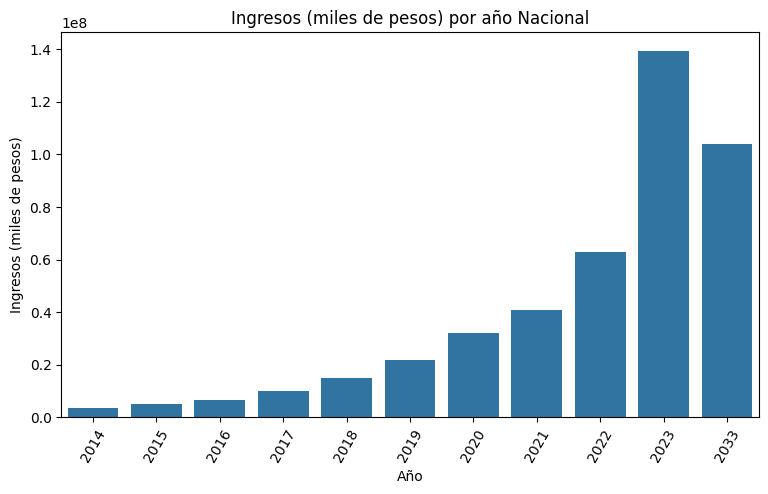

In [65]:
# agrupamos por año para analizar el cambio temporal
ingresos_por_año = df12.groupby('Año')['Ingresos (miles de pesos)'].mean().reset_index()

# graficamos bajada nacional por año
plt.figure(figsize=(9, 5))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', data=ingresos_por_año)
plt.title('Ingresos (miles de pesos) por año Nacional')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=60)
plt.show()

### Notamos que el analista del ENACOM puede ver en el futuro, y predice una caída para el año 2033. Eso, o hay un tipeo en la ingesta de datos

In [66]:
registros_2033 = df12.loc[df12['Año'] == 2033]
registros_2033

,Año,Trimestre,Ingresos (miles de pesos),Periodo
3,2033,1,1.041350e+08,Ene-Mar 2023


Podemos ver que el año correcto debió ser 2023, por lo que modificamos la entrada

In [67]:
# Modificamos el año incorrecto en el dataframe
df12.loc[df12['Año'] == 2033, 'Año'] = 2023

In [68]:
df12.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2023,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [69]:
# eliminamos la columna periodo
df12.drop('Periodo', axis=1, inplace=True)

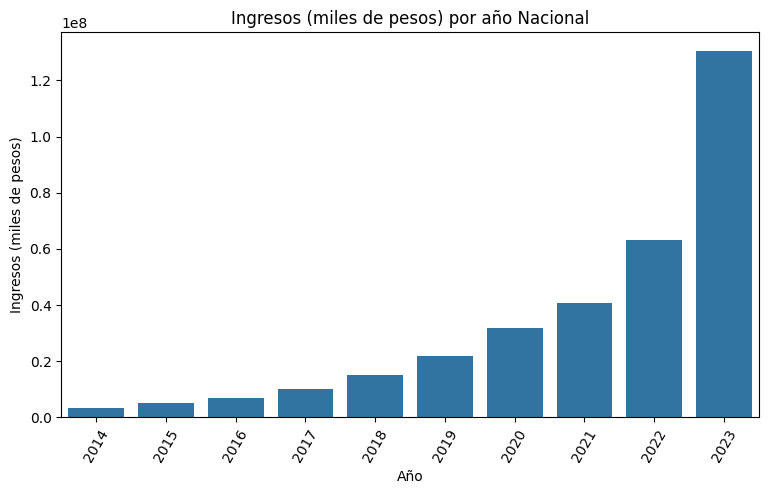

In [70]:
# agrupamos por año para analizar el cambio temporal
ingresos_por_año = df12.groupby('Año')['Ingresos (miles de pesos)'].mean().reset_index()

# graficamos bajada nacional por año
plt.figure(figsize=(9, 5))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', data=ingresos_por_año)
plt.title('Ingresos (miles de pesos) por año Nacional')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=60)
plt.show()

### Corregido el año mal ingresado, igualmente vemos la existencia de outliers fuertes en ingresos, puesto que los ingresos han aumentado exponencialmente. Esto es producto de un contexto económico y sociopolítico propio y no de errores en la ingesta de datos
<hr>

<h2 align=center> Adaptación de Datos

### Finalmente, con la data preprocesada contenida en 12 dataframes se dispone a combinar las distintas hojas limpiadas en 2 archivos separados:

1. Datos Nacionales Por Trimestre (datos_nacionales.xlsx)
    - df2 (mbps)
    - df3 (adsl, cablemodem, fibra optica, wireless, otros y total)
    - df6 (banda ancha, dial up, total)
    - df9 (100 hab, 100 hog)
    - df10 (velocidades, otros, total)
    - df12 (ingresos)

    
2. Datos Provinciales por Trimestre (datos_provinciales.xlsx)
    - df1 (mbps)
    - df4 (adsl, cablemodem, fibra optica, wireless, otros y total)
    - df5 (dial up, banda ancha, total)
    - df7 (100 hab)
    - df8 (100 hog)
    - df11 (velocidades, otros, total)

In [71]:
# Se realiza un Merge de los DF Nacionales limpiados para tenerlos en 1 solo archivo

nacional = pd.merge(df2, df3, on=['Año', 'Trimestre'], how='inner')
nacional = pd.merge(nacional, df6, on=['Año', 'Trimestre'], how='inner')
nacional = pd.merge(nacional, df9, on=['Año', 'Trimestre'], how='inner')
nacional = pd.merge(nacional, df10, on=['Año', 'Trimestre'], how='inner')
nacional = pd.merge(nacional, df12, on=['Año', 'Trimestre'], how='inner')
nacional.head(3)

# se le arreglan algunos nombres de columnas
nacional.rename(columns={'Otros': 'Otros_tec', 'OTROS': 'Otros_vel'})



,Año,Trimestre,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros_tec,Total_tec,Banda ancha fija,...,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros_vel,Total_vel,Ingresos (miles de pesos)
0,2023,4,139.040000,836390,6022532,3908183,585760,194796,11547661,11535868,...,29708,71742,900253,978108,697232,350290,8224736,295592,11547661,1.673760e+08
1,2023,3,129.670000,897895,6018832,3708718,581436,200027,11406908,11395115,...,30274,80609,945608,998725,720084,350918,8003269,277421,11406908,1.331066e+08
2,2023,2,123.950000,1006509,5997149,3463988,581823,202428,11251897,11239781,...,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897,1.180603e+08
3,2023,1,110.500000,1204417,6002582,3243411,576647,214838,11241895,11229459,...,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895,1.041350e+08
4,2022,4,106.560000,1315373,6037457,3060575,572969,221740,11208114,11195668,...,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114,7.244348e+07
5,2022,3,62.460000,1395277,6031970,2871541,557110,235230,11091128,11078691,...,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128,6.408678e+07
6,2022,2,58.440000,1468333,5979214,2723285,556243,231609,10958684,10946248,...,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684,6.041950e+07
7,2022,1,55.110000,1533240,6073426,2219533,545814,251996,10624009,10611390,...,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009,5.521931e+07
8,2021,4,52.340000,1657615,5984240,2072236,523107,252596,10489794,10476933,...,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794,4.546789e+07
9,2021,3,48.460000,1950631,5826257,1566048,492415,250190,10085541,10075184,...,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541,4.299994e+07


In [72]:
nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Mbps (Media de bajada)        40 non-null     float64
 3   ADSL                          40 non-null     int64  
 4   Cablemodem                    40 non-null     int64  
 5   Fibra óptica                  40 non-null     int64  
 6   Wireless                      40 non-null     int64  
 7   Otros                         40 non-null     int64  
 8   Total_tec                     40 non-null     int64  
 9   Banda ancha fija              40 non-null     int64  
 10  Dial up                       40 non-null     int64  
 11  Total_dialBaf                 40 non-null     int64  
 12  Accesos por cada 100 hogares  40 non-null     float64
 13  Accesos

### Se exportan estos datos al archivo

In [73]:

nacional.to_excel('datos_nacionales.xlsx', index=False)

Ahora un Merge de los dataframes por Provincia

In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    object 
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total_tec     960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 75.0+ KB


In [75]:
# Se realiza un Merge de los DF Provinciales limpiados para tenerlos en 1 solo archivo

provincial = pd.merge(df1, df4, on=['Año', 'Trimestre', 'Provincia'], how='inner')
provincial = pd.merge(provincial, df5, on=['Año', 'Trimestre', 'Provincia'], how='inner')
provincial = pd.merge(provincial, df7, on=['Año', 'Trimestre', 'Provincia'], how='inner')
provincial = pd.merge(provincial, df8, on=['Año', 'Trimestre', 'Provincia'], how='inner')
provincial = pd.merge(provincial, df11, on=['Año', 'Trimestre', 'Provincia'], how='inner')
provincial.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_tec,...,Accesos por cada 100 hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras_vel,Total_vel
0,2023,4,Buenos Aires,158.49,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,...,80.96,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2023,4,Capital Federal,234.44,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0,...,117.02,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2023,4,Catamarca,89.40,6669.0,11016.0,55437.0,1384.0,81.0,74587.0,...,68.63,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2023,4,Chaco,107.14,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0,...,44.35,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2023,4,Chubut,20.29,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0,...,84.96,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [76]:
# se cambia el nombre de la columna otros
provincial.rename(columns={'Otros': 'Otros_tec'}, inplace=True)

In [77]:
provincial.head(2)

,Año,Trimestre,Provincia,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros_tec,Total_tec,...,Accesos por cada 100 hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras_vel,Total_vel
0,2023,4,Buenos Aires,158.49,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,...,80.96,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2023,4,Capital Federal,234.44,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0,...,117.02,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0


### Se guarda el dataset en un archivo

In [78]:
# se guarda en un excel aparte
provincial.to_excel('datos_provinciales.xlsx', index=False)

### Por último, la data original extraida de ENACOM se convierte en 2 archivos xlsx (nacional y provincia) donde el último será procesado en el notebook 'KPI.ipynb' para la extracción de los KPI del análisis

## Conclusiones del EDA

- La información contenida en el dataset se agrupa en 3 grandes temas: Acceso, Velocidad de conexión y Tecnología de conexión, cuya data está separada por provincia y trimestre abarcando desde comienzo del año 2014 a fin del 2023

- No se encontraron datos duplicados ni outliers corregibles, solo algunas entradas nulas o perturbadas, que fueron solventadas según el caso.

- Se puede observar un fuerte crecimiento en Acceso y Velocidad a través del tiempo, y cambios en las tecnologías de conexión.

- Una correlación negativa entre distintas tecnologías de conexión nos habla de cambios en la arquitectura, y la correlación positiva entre accesos por fibra óptica y cablemodem respecto a la velocidad promedio de descarga nos habla de la modernización de las conexiones.

- Los datos preprocesados se guardaron en archivos .xlsx para su posterior análisis en Power BI